In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df=pd.read_csv('ALL_PM10.csv')

In [ ]:
#Split the time into separate columns for day, month and year
df.ReadingDateTime = pd.to_datetime(df.ReadingDateTime,format = ("%d/%m/%Y %H:%M"))

# Create 3 new columns
df[['year','month','day']] = df.ReadingDateTime.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
df1 = df.loc[df['year'].isin(['2019','2020','2021'])]  

# Remove outliers
aQ1 = df1['Value'].quantile(0.25)
aQ3 = df1['Value'].quantile(0.75)
aIQR = aQ3 - aQ1
filter = (df1['Value'] >= aQ1 - 1.5 * aIQR) & (df1['Value'] <= aQ3 + 1.5 *aIQR)
df1 = df1[filter]
df1

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,year,month,day
1470,BG2,PM10,2019-01-10,29.1,ug m-3 reference equiv by VCM,R,2019,01,10
1471,BG2,PM10,2019-01-11,20.8,ug m-3 reference equiv by VCM,R,2019,01,11
1472,BG2,PM10,2019-01-12,10.0,ug m-3 reference equiv by VCM,R,2019,01,12
1473,BG2,PM10,2019-01-13,10.4,ug m-3 reference equiv by VCM,R,2019,01,13
1474,BG2,PM10,2019-01-14,16.2,ug m-3 reference equiv by VCM,R,2019,01,14
...,...,...,...,...,...,...,...,...,...
252091,KT6,PM10,2021-10-27,13.0,ug/m3,P,2021,10,27
252092,KT6,PM10,2021-10-28,16.0,ug/m3,P,2021,10,28
252093,KT6,PM10,2021-10-29,18.0,ug/m3,P,2021,10,29
252094,KT6,PM10,2021-10-30,11.0,ug/m3,P,2021,10,30


In [ ]:
df2019 = df1.loc[df['year'].isin(['2019'])]
df2020 = df1.loc[df['year'].isin(['2020'])]
df2021 = df1.loc[df['year'].isin(['2021'])]

df19 = df2019.groupby(["month"]).mean()
df20 = df2020.groupby(["month"]).mean()
df21 = df2021.groupby(["month"]).mean()

df19.columns = pd.Series(['2019'])
df20.columns = pd.Series(['2020'])
df21.columns = pd.Series(['2021'])

result1 = pd.merge(df19,df20,left_index=True,right_index=True)
result2 = pd.merge(result1,df21,left_index=True,right_index=True,how='outer')

In [ ]:
result2.to_csv('PM10clean.csv')

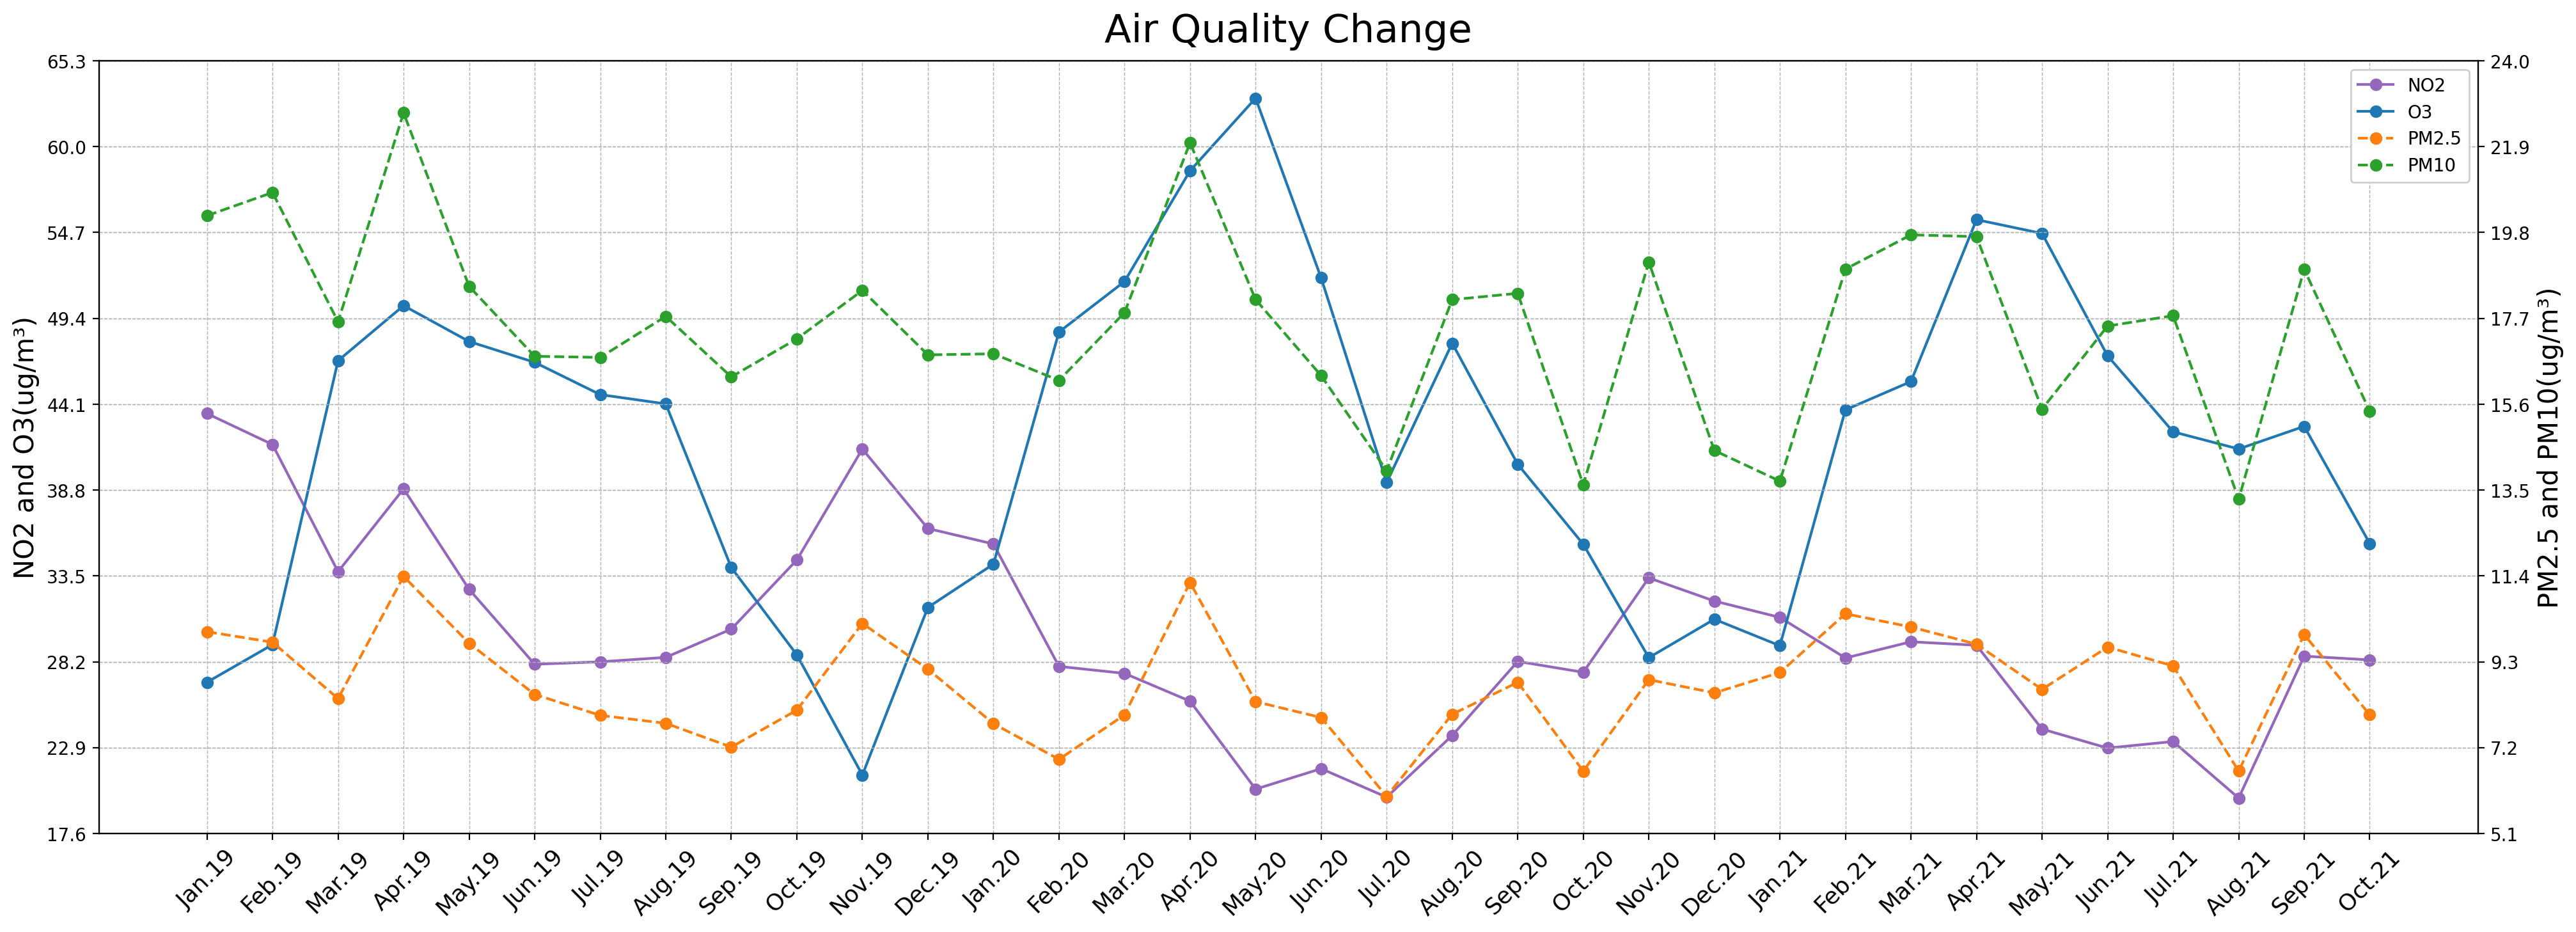

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t1=pd.read_csv('ALL.csv')
plt.style.use("fast")

fig, ax1 = plt.subplots(figsize=(24,8),dpi=200)
plt.xticks(fontsize=13, rotation=45)

plot1 = ax1.plot(t1['Date'], t1['NO2'], c='#9467bd', marker='o', label='NO2')
plot1 = ax1.plot(t1['Date'], t1['O3'], marker='o', label='O3')

ax2 = ax1.twinx()
plot2 = ax2.plot(t1['Date'], t1['PM2.5'], c='#ff7f0e', marker='o', linestyle = '--', label='PM2.5')
plot2 = ax2.plot(t1['Date'], t1['PM10'], c='#2ca02c', marker='o', linestyle = '--', label='PM10')
ax2.grid(axis='y', linestyle = '--', linewidth = 0.5)

ax1.grid(linestyle = '--', linewidth = 0.5)
#ax1.set_xlabel('Time Period', fontsize=18)
ax1.set_title('Air Quality Change', fontsize=22, verticalalignment='bottom')

ax1.set_ylabel('NO2 and O3(ug/m³)', fontsize = 15)
ax2.set_ylabel('PM2.5 and PM10(ug/m³)', fontsize = 15)

plt.xticks(fontsize=13, rotation=45)
#ax1.yticks(fontsize=13)
fig.legend(loc=1, fontsize=10, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

#重合线
def calculate_ticks(ax, ticks, round_to=0.1, center=False):
    upperbound = np.ceil(ax.get_ybound()[1]/round_to)
    lowerbound = np.floor(ax.get_ybound()[0]/round_to)
    dy = upperbound - lowerbound
    fit = np.floor(dy/(ticks - 1)) + 1
    dy_new = (ticks - 1)*fit
    if center:
        offset = np.floor((dy_new - dy)/2)
        lowerbound = lowerbound - offset
    values = np.linspace(lowerbound, lowerbound + dy_new, ticks)
    return values*round_to
fig.legend(loc=1, fontsize=10, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

ax1.set_yticks(calculate_ticks(ax1, 10))
ax2.set_yticks(calculate_ticks(ax2, 10))